In [1]:
library(readr)
library(dplyr)
library(randomForest)
library(Hmisc)
library(party)
library(data.table)
library(ggplot2)
library(plyr)
library(dplyr)
library(corrplot)
library(pROC)
library(glmnet)
library(caret)
library(Rtsne)
library(doMC)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin


Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zo

In [2]:
data <- read.csv("creditcard.csv")


In [3]:
data$Class <- factor(data$Class)


In [4]:
index <- sample(2,nrow(data),prob = c(0.7,0.3),replace = TRUE)


In [5]:
train <- data[index==1,]
test <- data[index==2,]

In [13]:
glimpse(train)

Observations: 199,183
Variables: 31
$ Time   <dbl> 0, 1, 1, 2, 2, 4, 7, 7, 10, 10, 10, 11, 12, 12, 12, 14, 15, ...
$ V1     <dbl> -1.3598071, -1.3583541, -0.9662717, -1.1582331, -0.4259659, ...
$ V2     <dbl> -0.07278117, -1.34016307, -0.18522601, 0.87773675, 0.9605230...
$ V3     <dbl> 2.53634674, 1.77320934, 1.79299334, 1.54871785, 1.14110934, ...
$ V4     <dbl> 1.37815522, 0.37977959, -0.86329128, 0.40303393, -0.16825208...
$ V5     <dbl> -0.338320770, -0.503198133, -0.010308880, -0.407193377, 0.42...
$ V6     <dbl> 0.46238778, 1.80049938, 1.24720317, 0.09592146, -0.02972755,...
$ V7     <dbl> 0.239598554, 0.791460956, 0.237608940, 0.592940745, 0.476200...
$ V8     <dbl> 0.098697901, 0.247675787, 0.377435875, -0.270532677, 0.26031...
$ V9     <dbl> 0.3637870, -1.5146543, -1.3870241, 0.8177393, -0.5686714, 0....
$ V10    <dbl> 0.09079417, 0.20764287, -0.05495192, 0.75307443, -0.37140720...
$ V11    <dbl> -0.55159953, 0.62450146, -0.22648726, -0.82284288, 1.3412619...
$ V12    <dbl> -

In [6]:
table(train$Class)
table(test$Class)


     0      1 
198830    353 


    0     1 
85485   139 

In [7]:
library("ROSE")

Loaded ROSE 0.0-3



In [8]:
data.rose <- ROSE(Class ~ ., data = train, seed = 1,N = 50000)$data
table(data.rose$Class)


    0     1 
24984 25016 

In [30]:
attach(data.rose)

In [9]:
library('class')

In [45]:
knn_rose <- knn(train = data.rose, test = test, cl = Class, k=3)


In [49]:
library(class)

In [56]:
predicted.knn <- knn(data.rose, test = test, cl = Class, k = 5)


In [57]:
confusionMatrix(predicted.knn, test$Class, positive = "1")


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 63144    85
         1 22341    54
                                         
               Accuracy : 0.7381         
                 95% CI : (0.7351, 0.741)
    No Information Rate : 0.9984         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0016         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.3884892      
            Specificity : 0.7386559      
         Pos Pred Value : 0.0024113      
         Neg Pred Value : 0.9986557      
             Prevalence : 0.0016234      
         Detection Rate : 0.0006307      
   Detection Prevalence : 0.2615505      
      Balanced Accuracy : 0.5635726      
                                         
       'Positive' Class : 1              
                                         

Area under the curve (AUC): 0.564

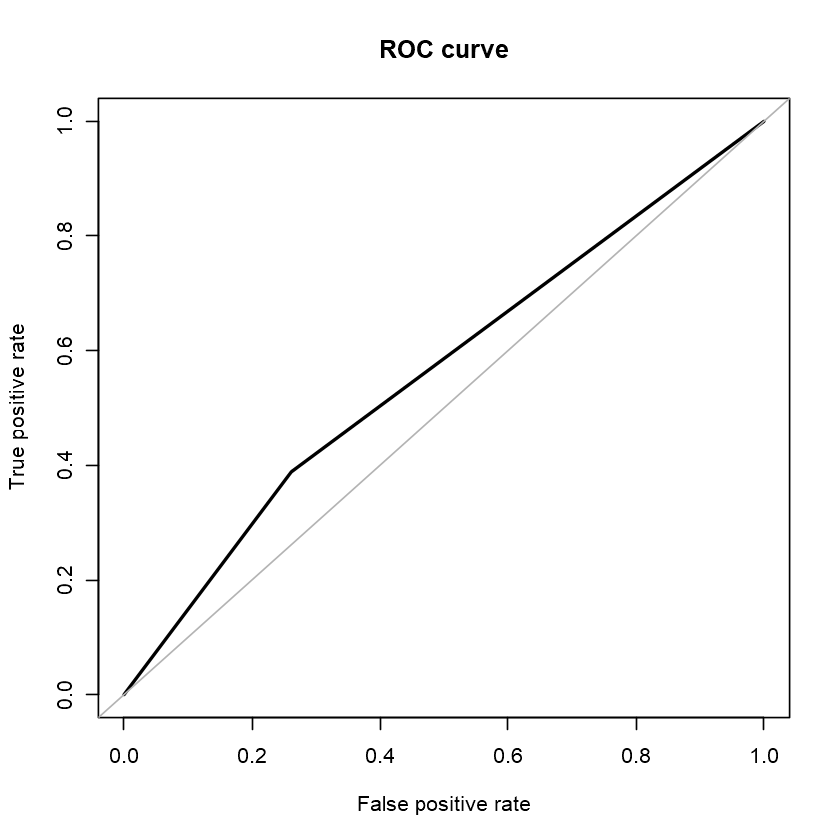

In [58]:
roc.curve(test$Class, predicted.knn, plotit = T)


In [60]:
library(naivebayes)
library(ROCR)




Attaching package: 'naivebayes'

The following object is masked from 'package:data.table':

    tables

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [61]:
bayes <- naive_bayes(Class~., data = data.rose, laplace = 1)


In [62]:
bayes$prior



      0       1 
0.49968 0.50032 

In [63]:
pred <- predict(bayes, test)


In [64]:
confusionMatrix(pred, test$Class, positive = "1")


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 83896    26
         1  1589   113
                                         
               Accuracy : 0.9811         
                 95% CI : (0.9802, 0.982)
    No Information Rate : 0.9984         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1201         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.812950       
            Specificity : 0.981412       
         Pos Pred Value : 0.066392       
         Neg Pred Value : 0.999690       
             Prevalence : 0.001623       
         Detection Rate : 0.001320       
   Detection Prevalence : 0.019878       
      Balanced Accuracy : 0.897181       
                                         
       'Positive' Class : 1              
                                         

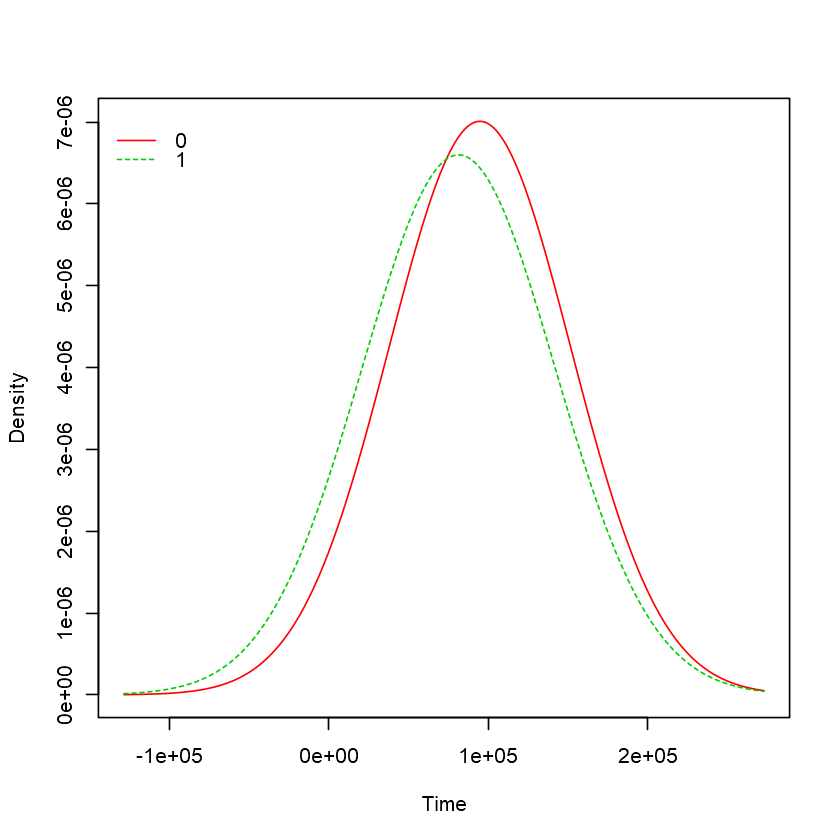

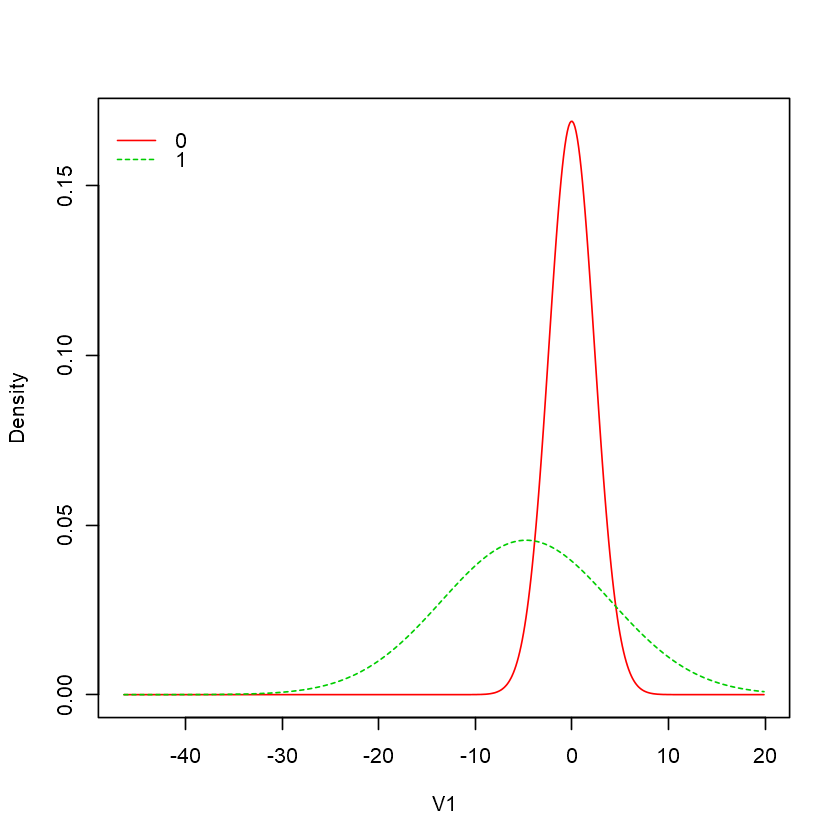

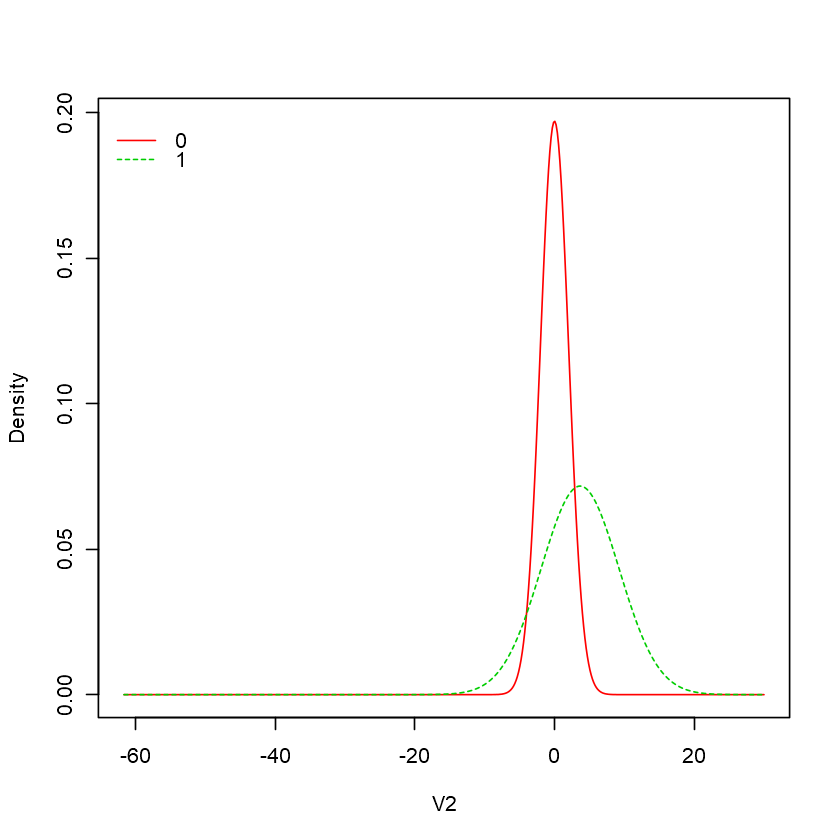

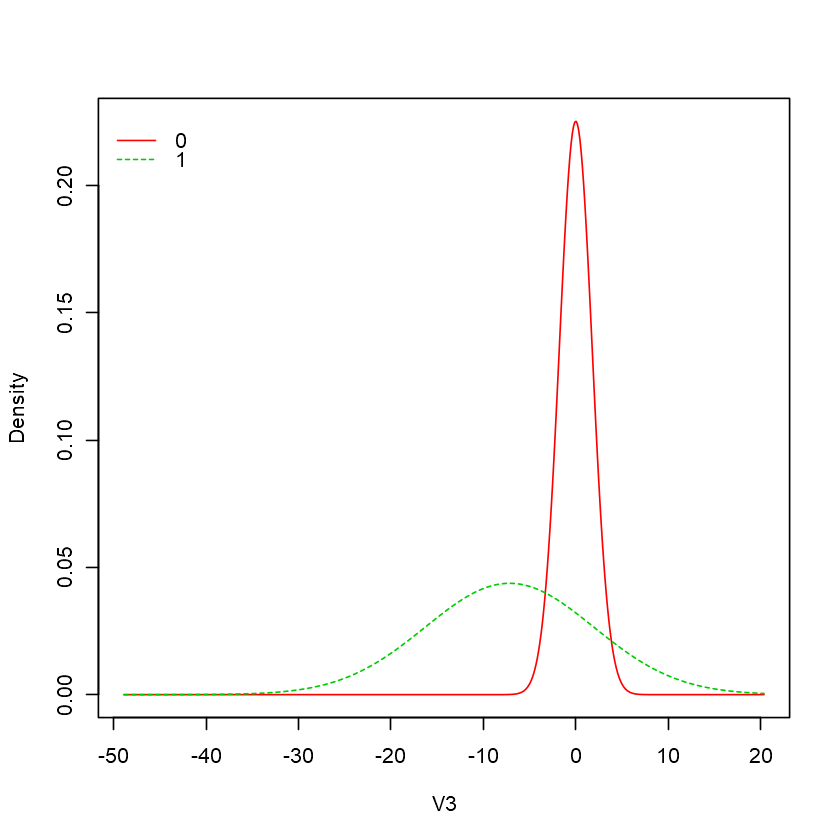

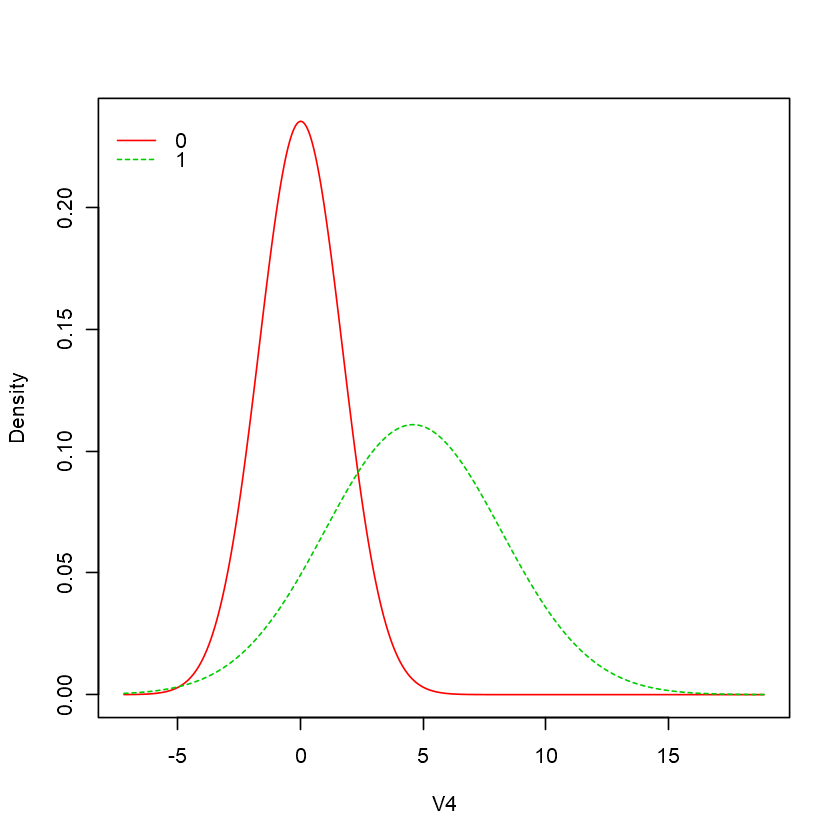

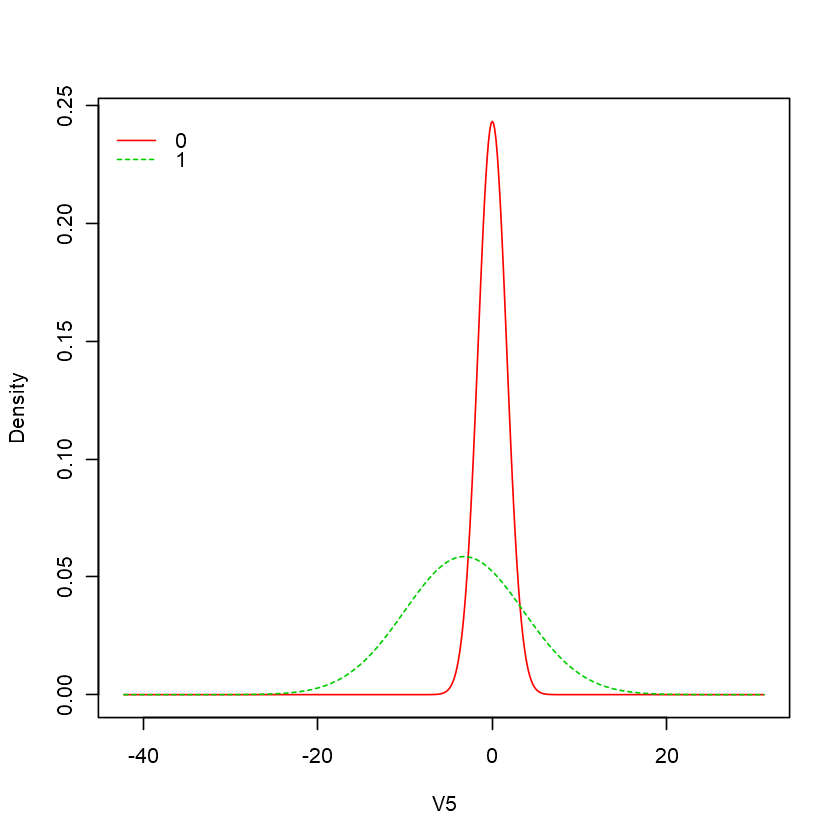

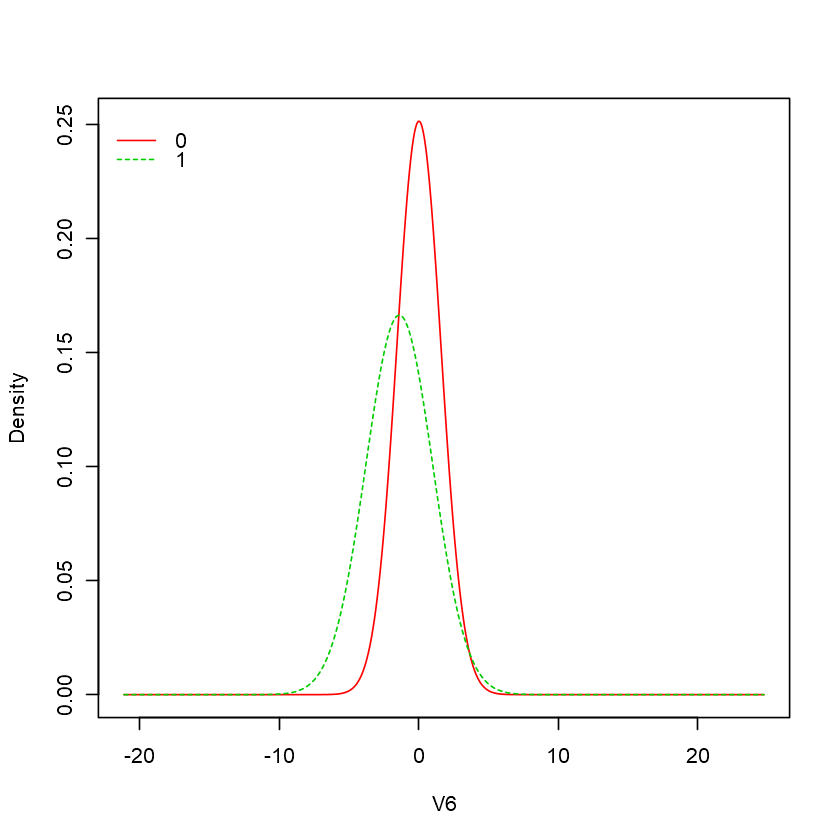

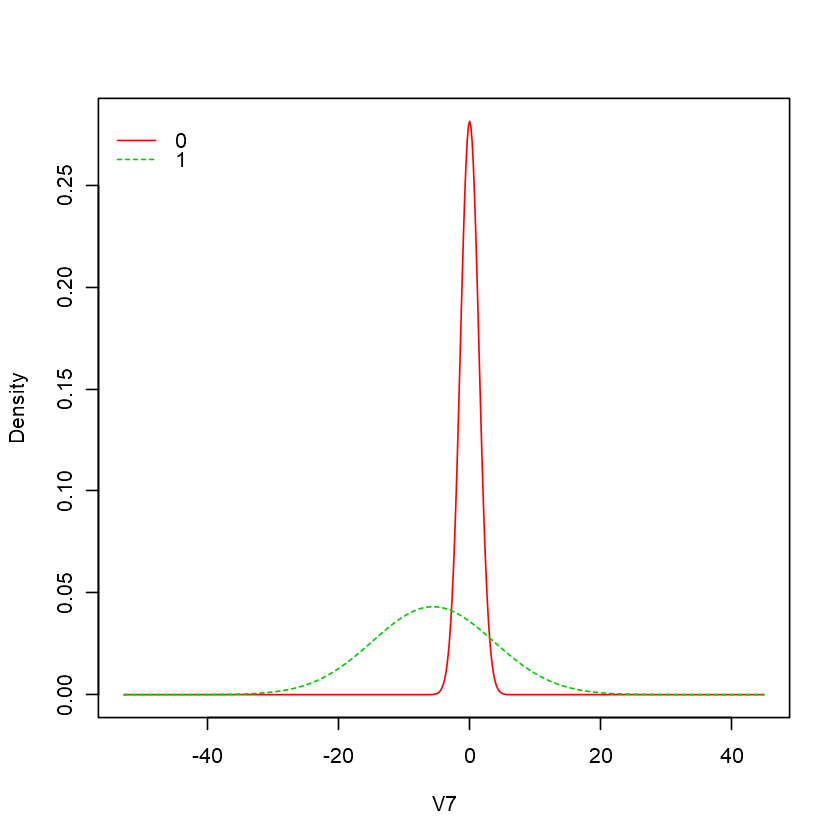

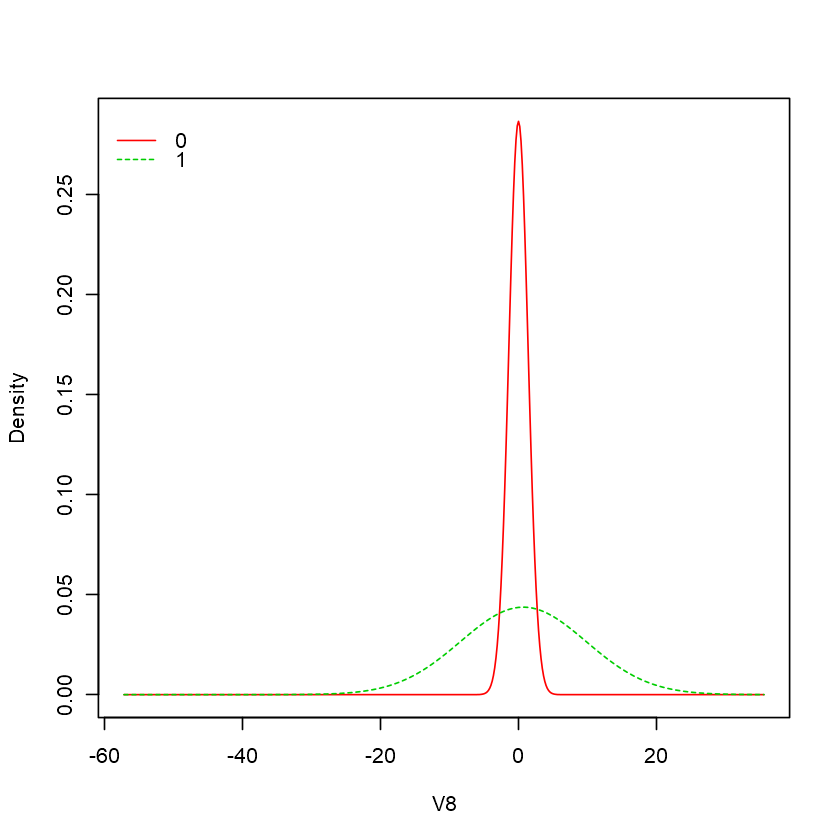

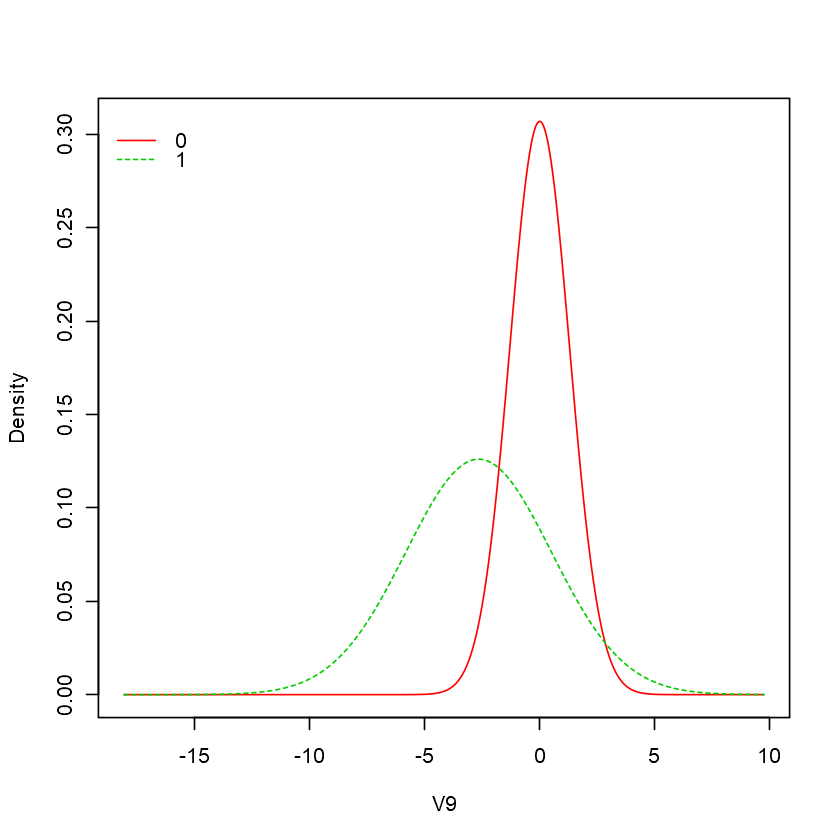

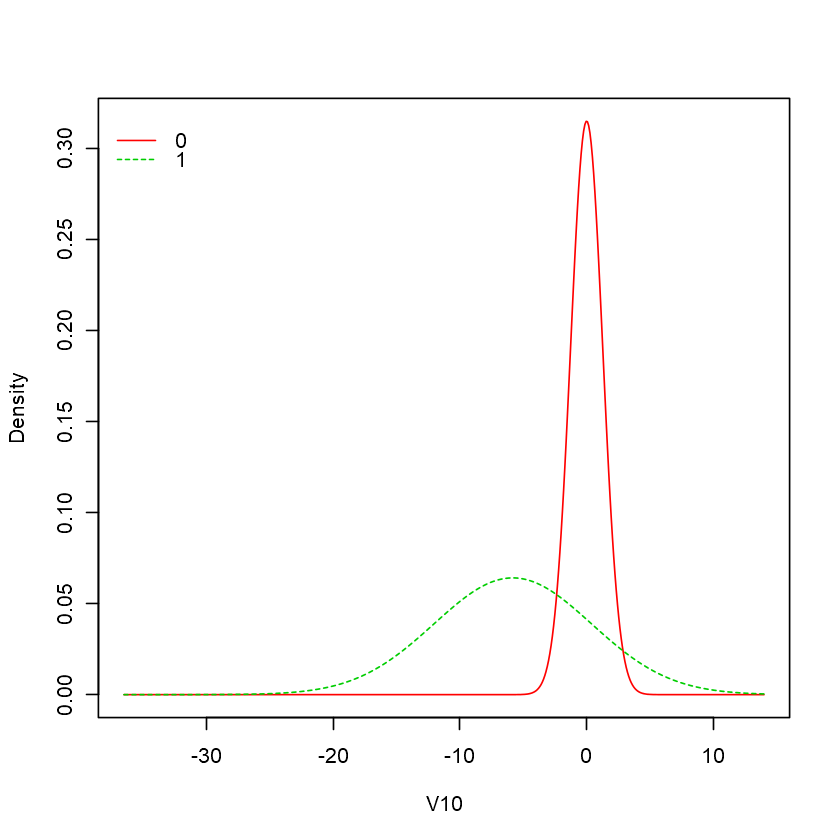

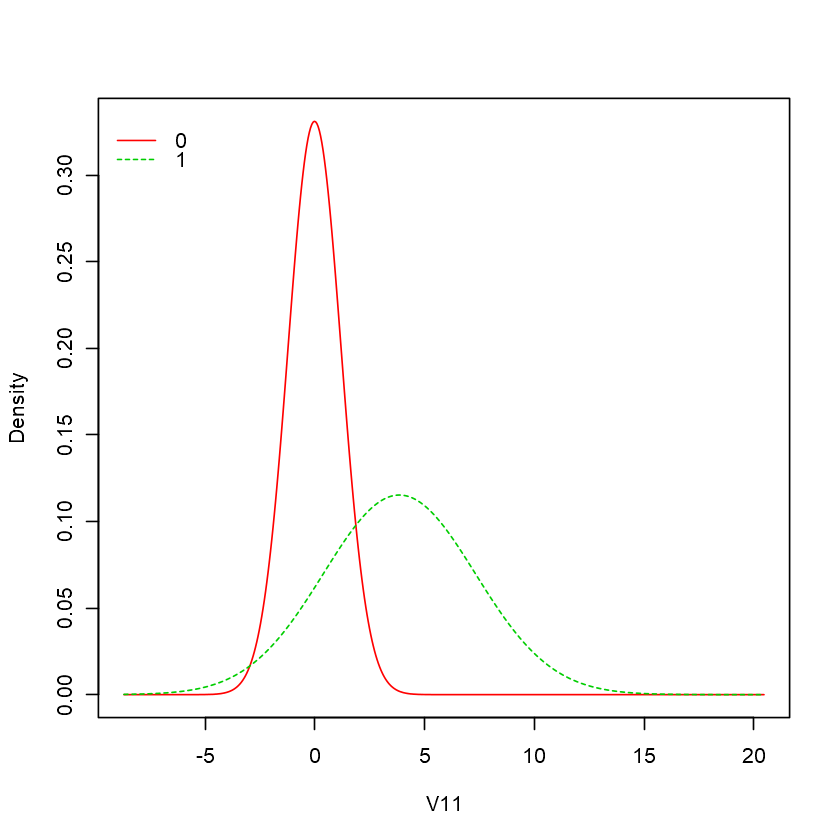

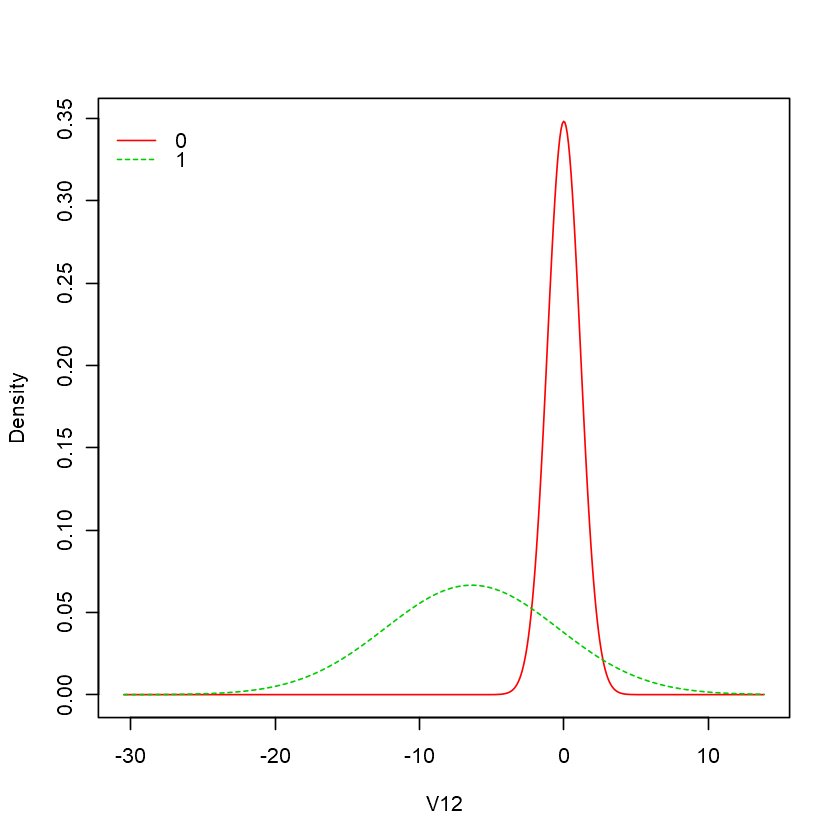

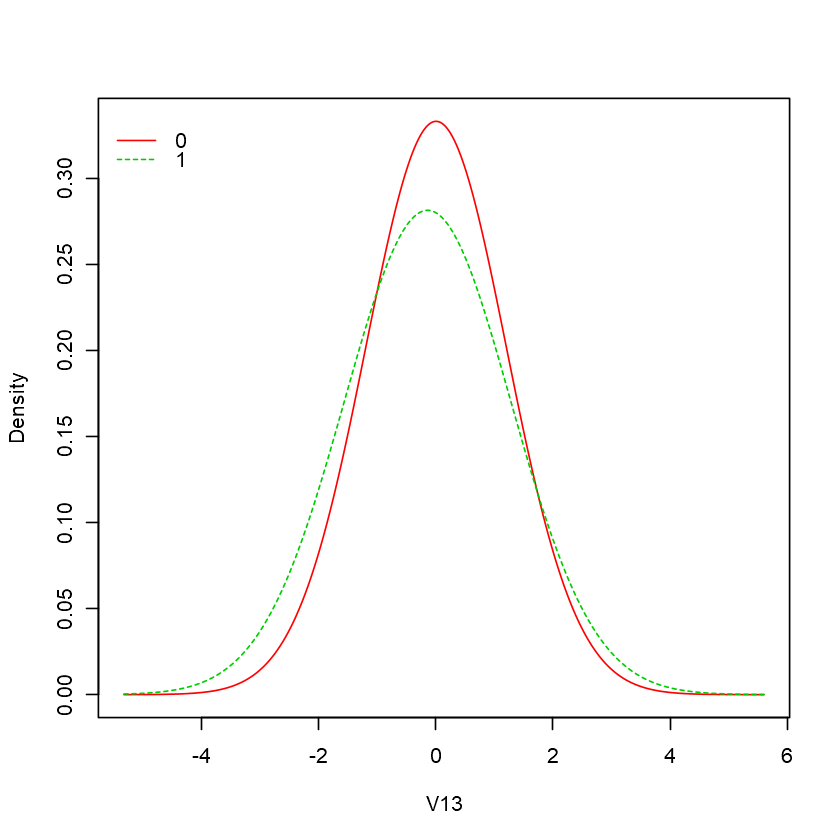

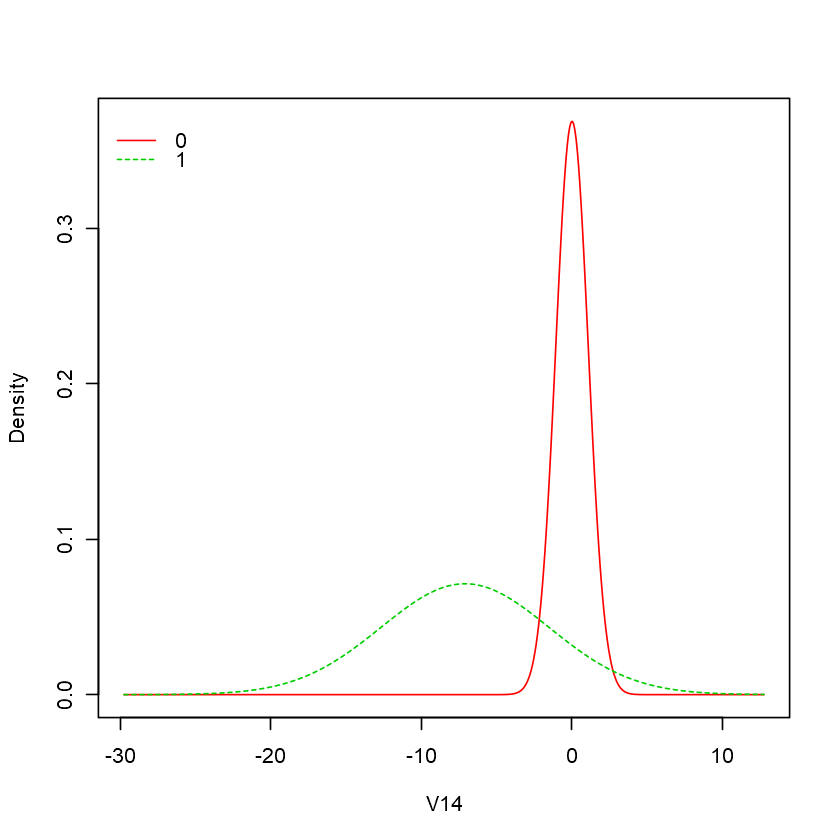

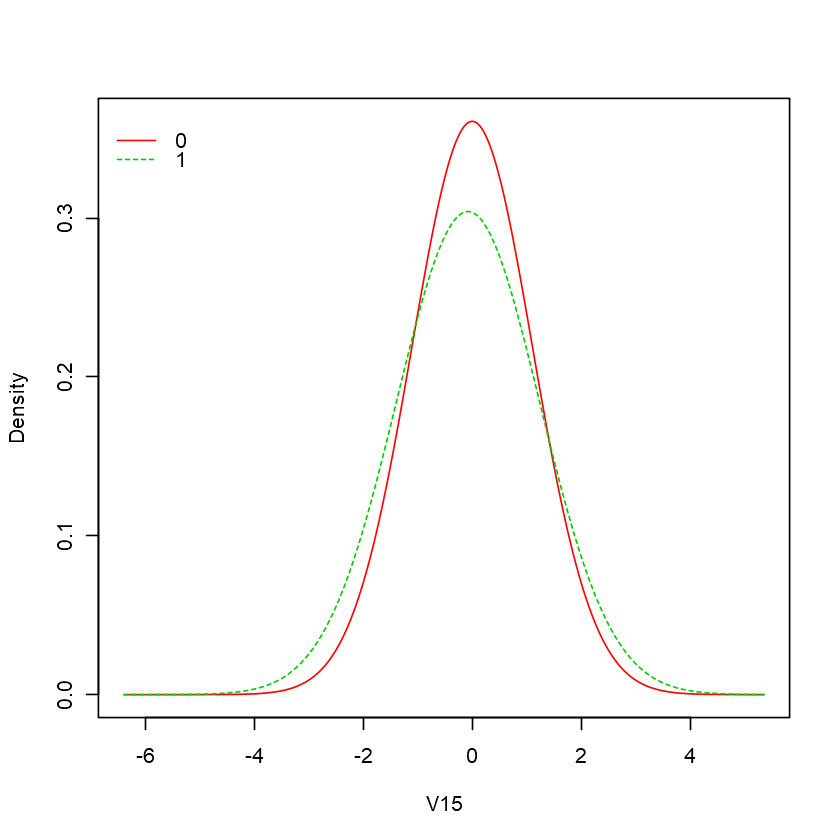

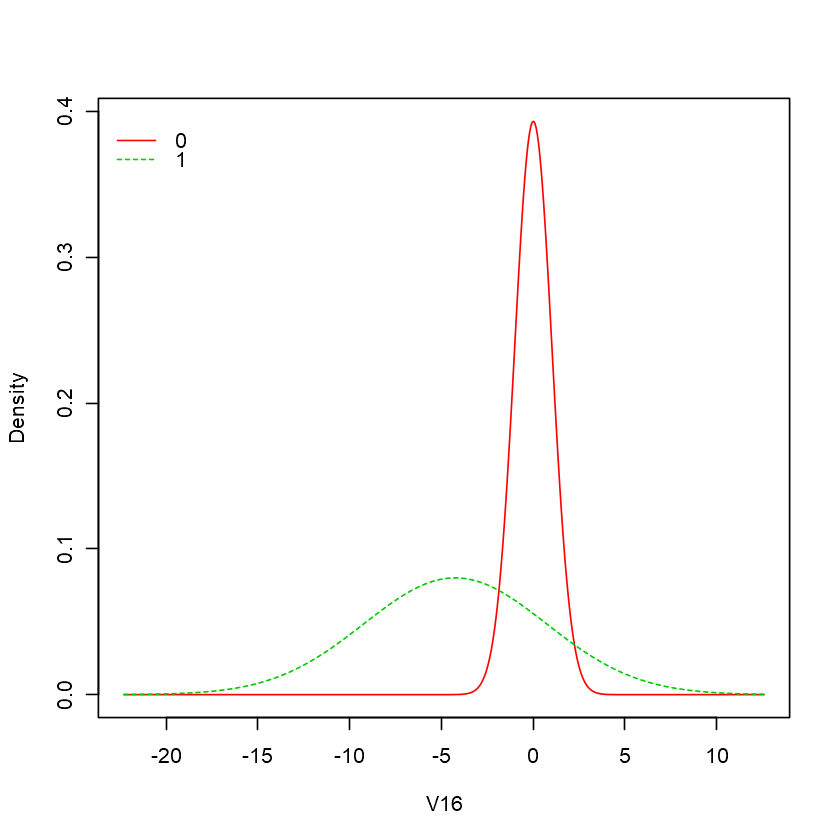

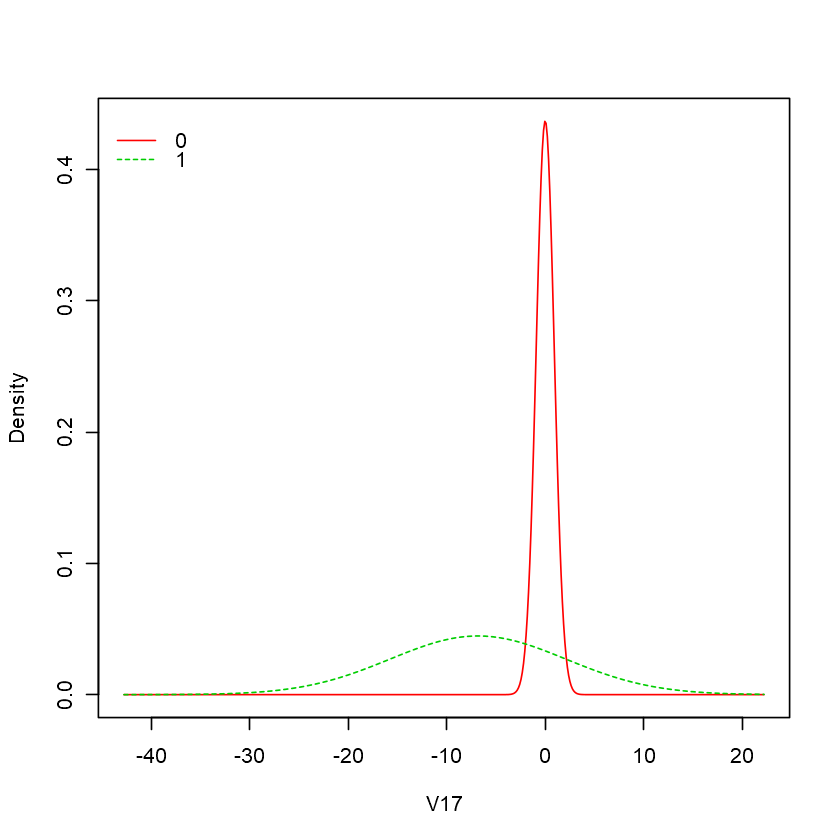

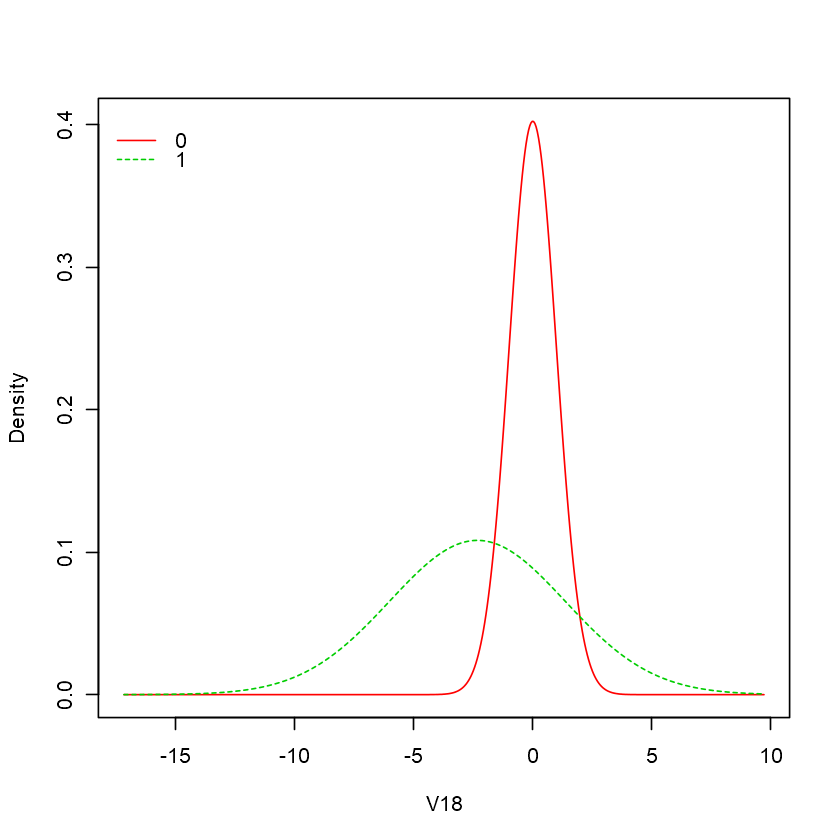

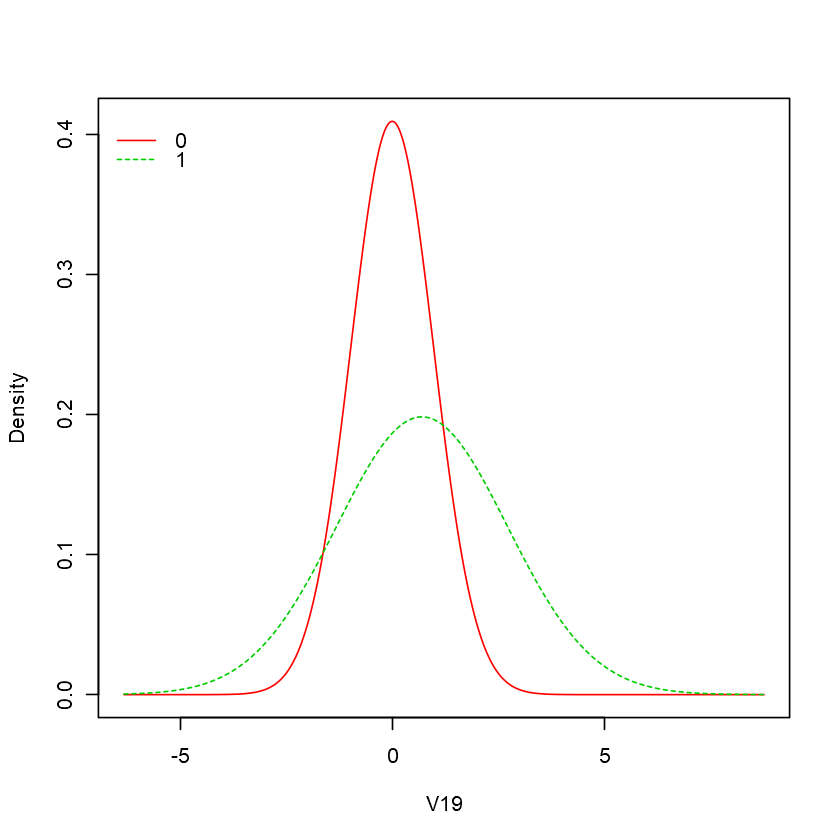

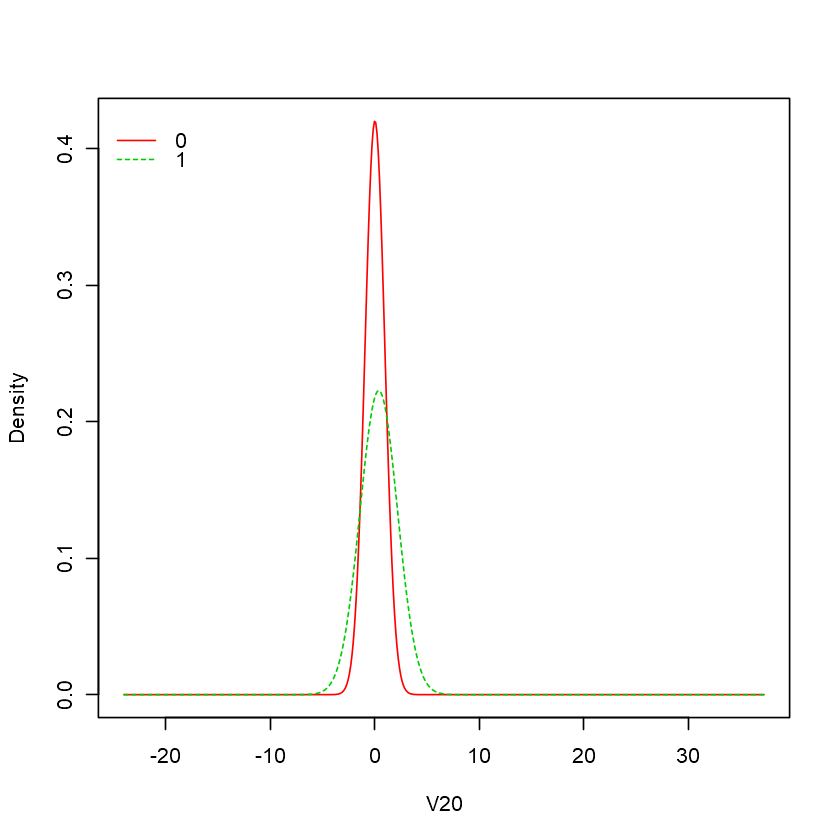

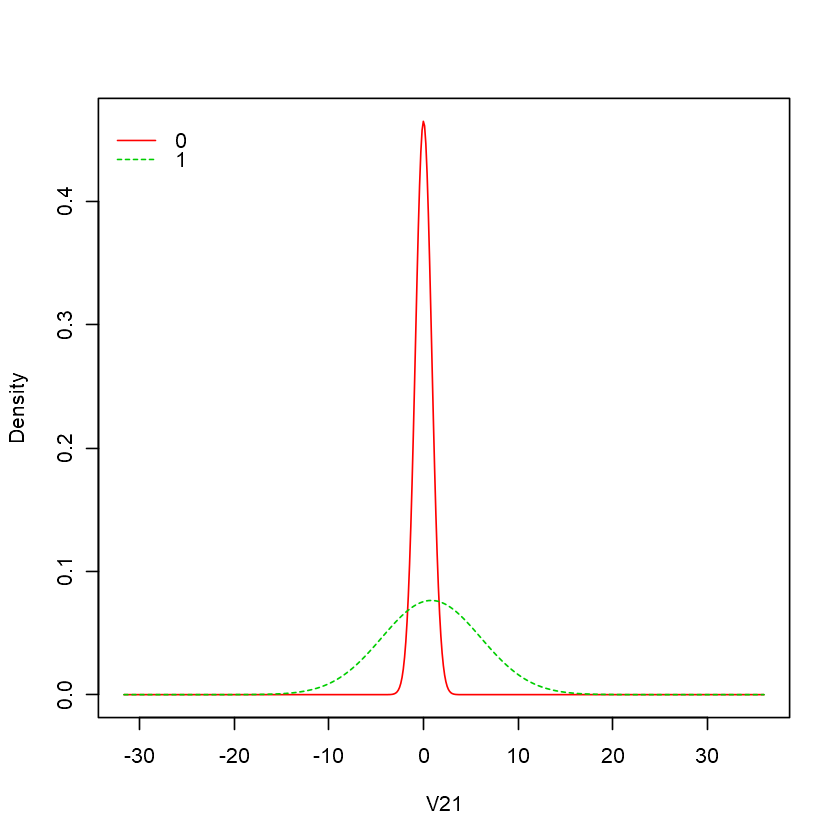

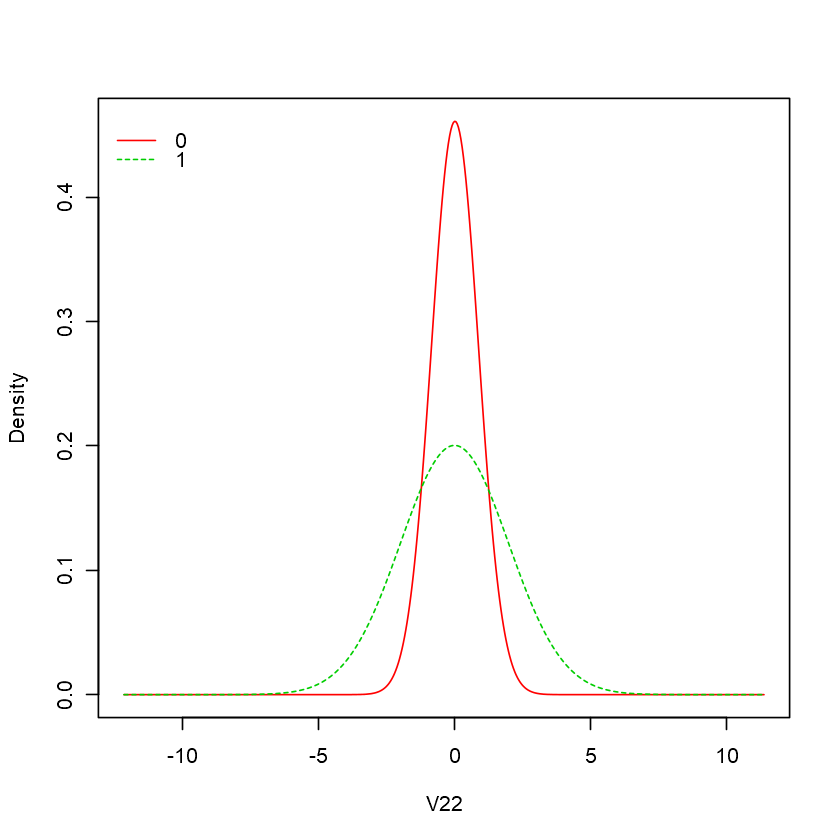

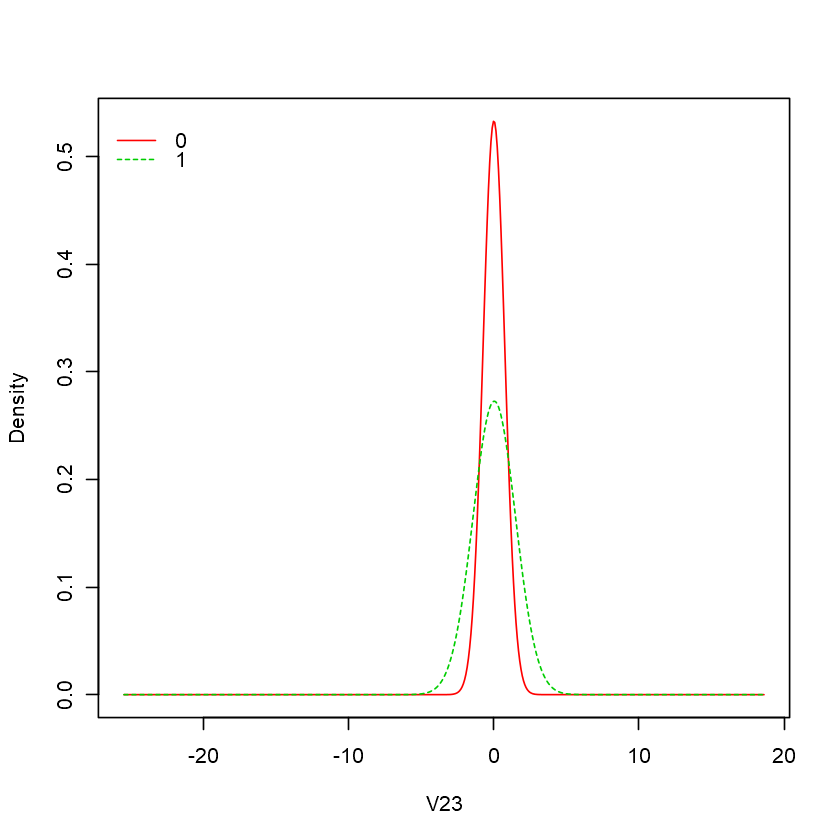

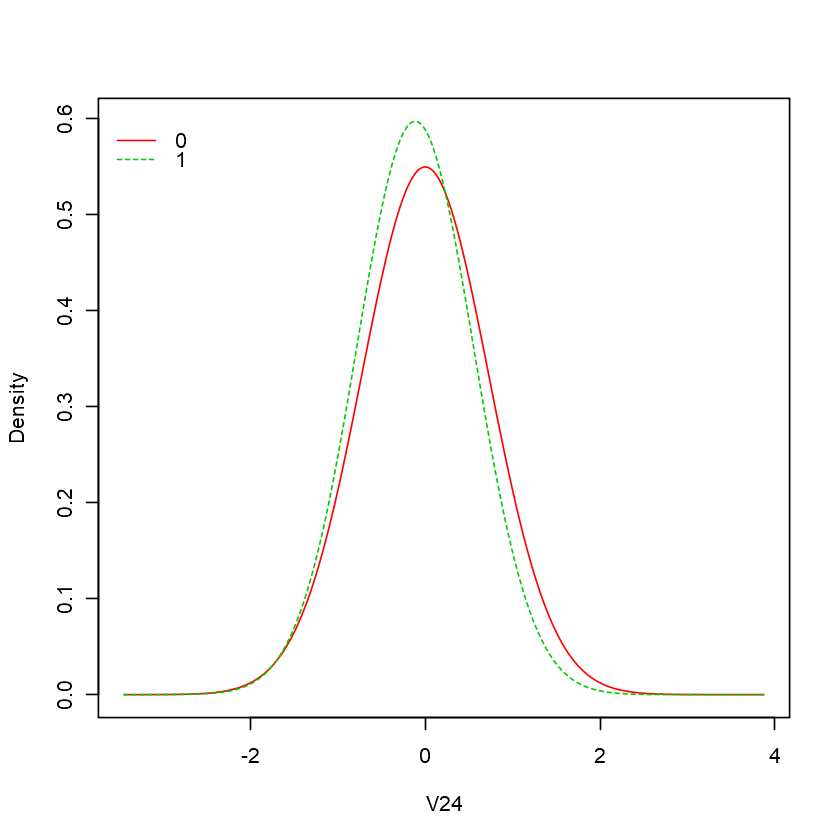

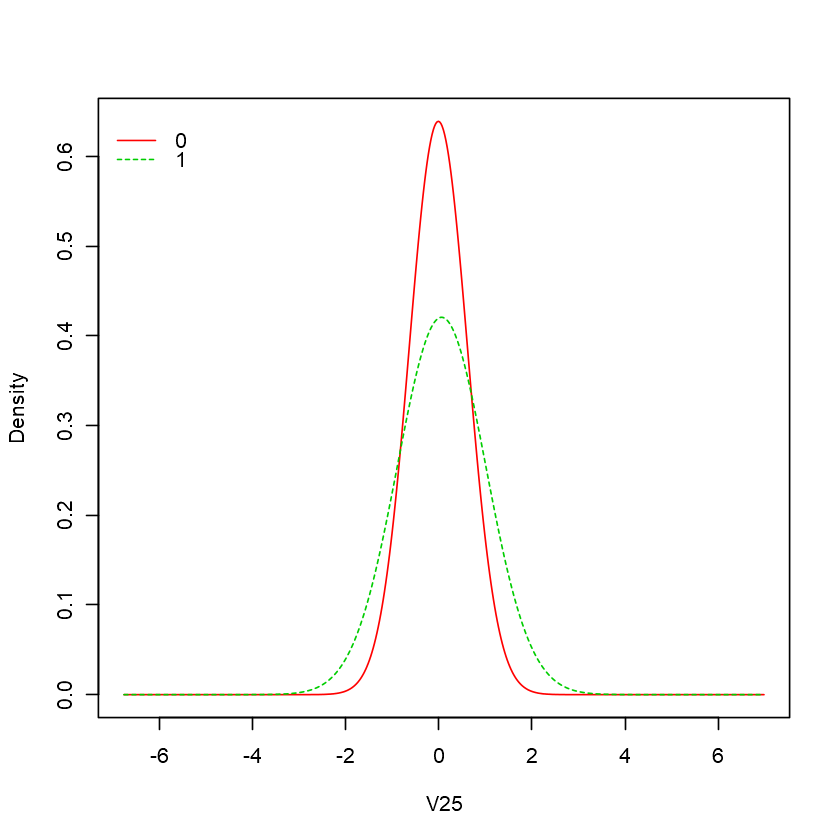

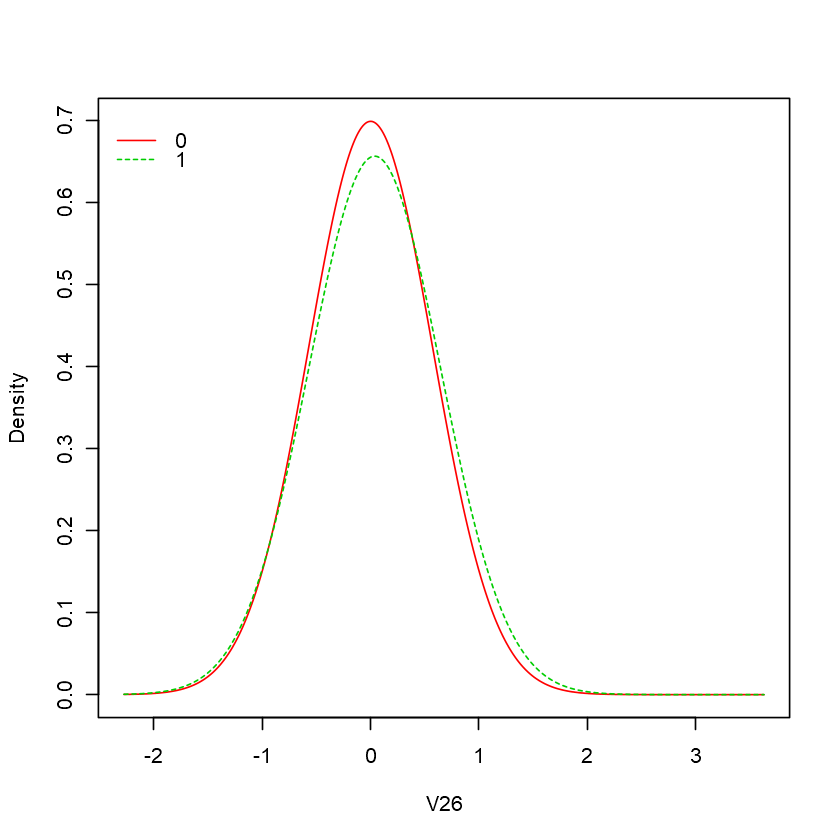

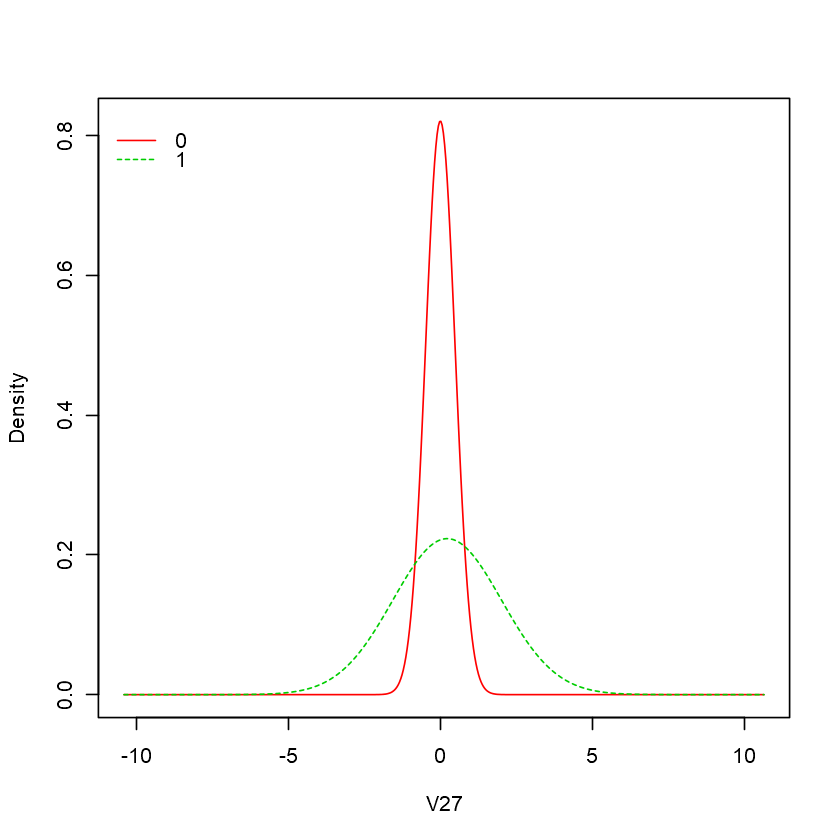

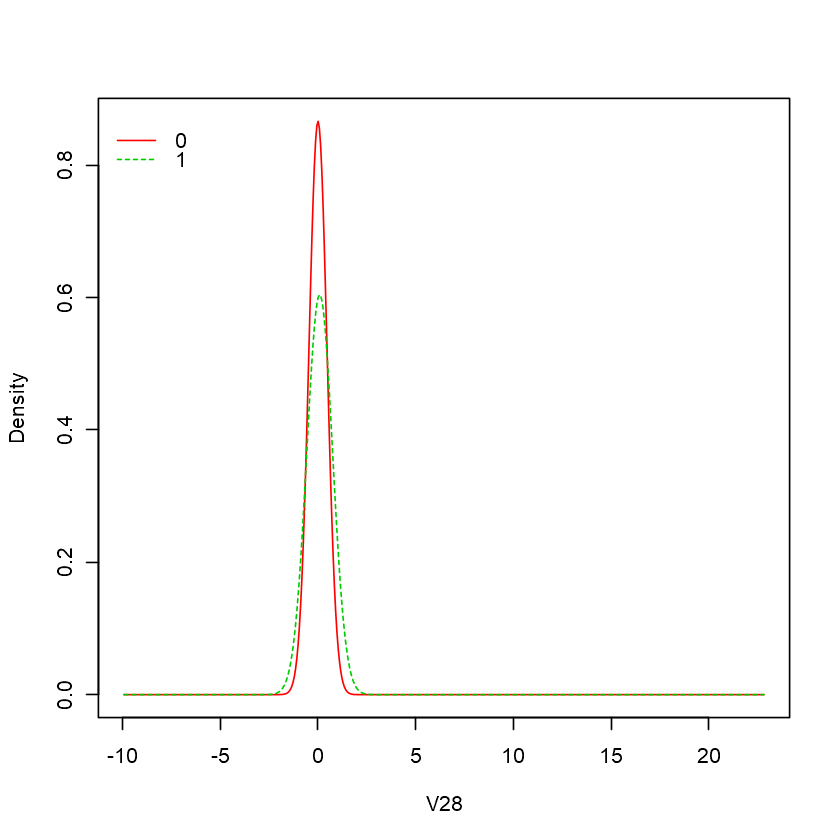

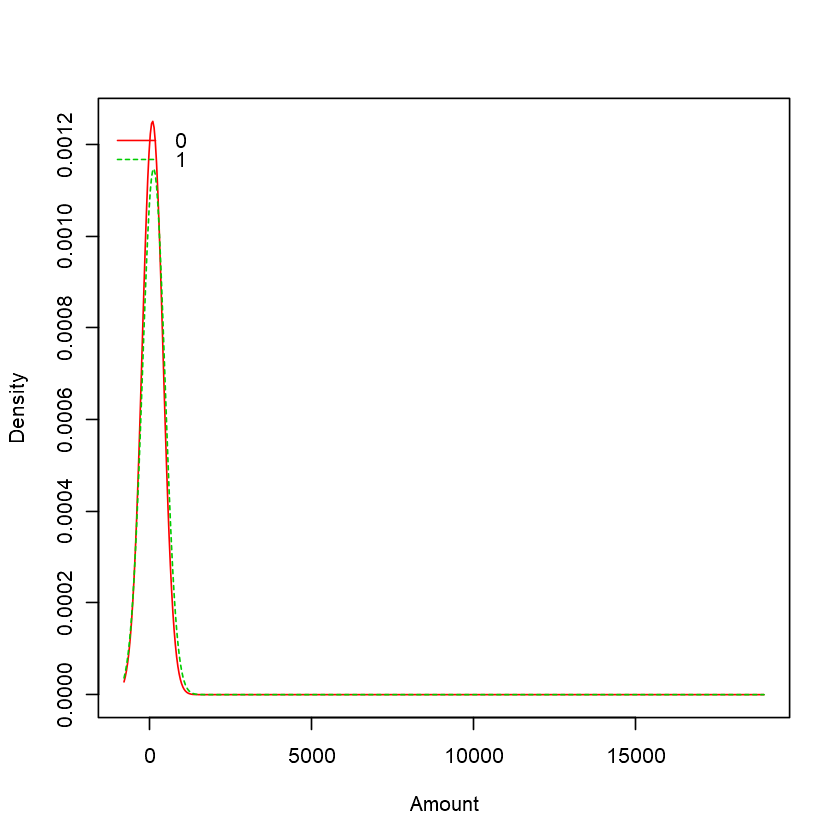

In [65]:
plot(bayes,ask=TRUE)


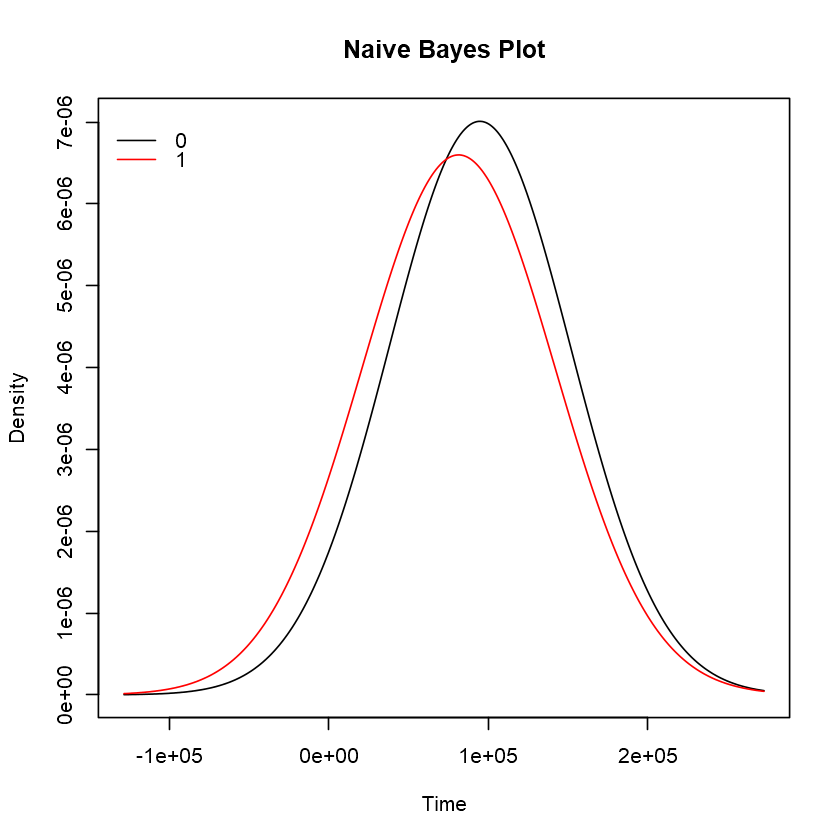

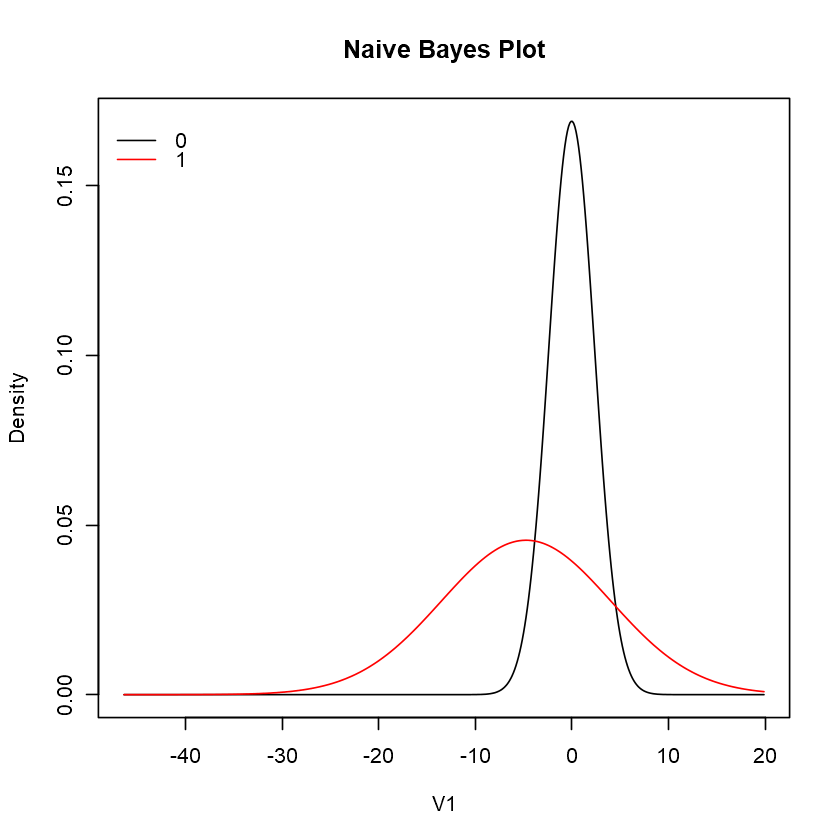

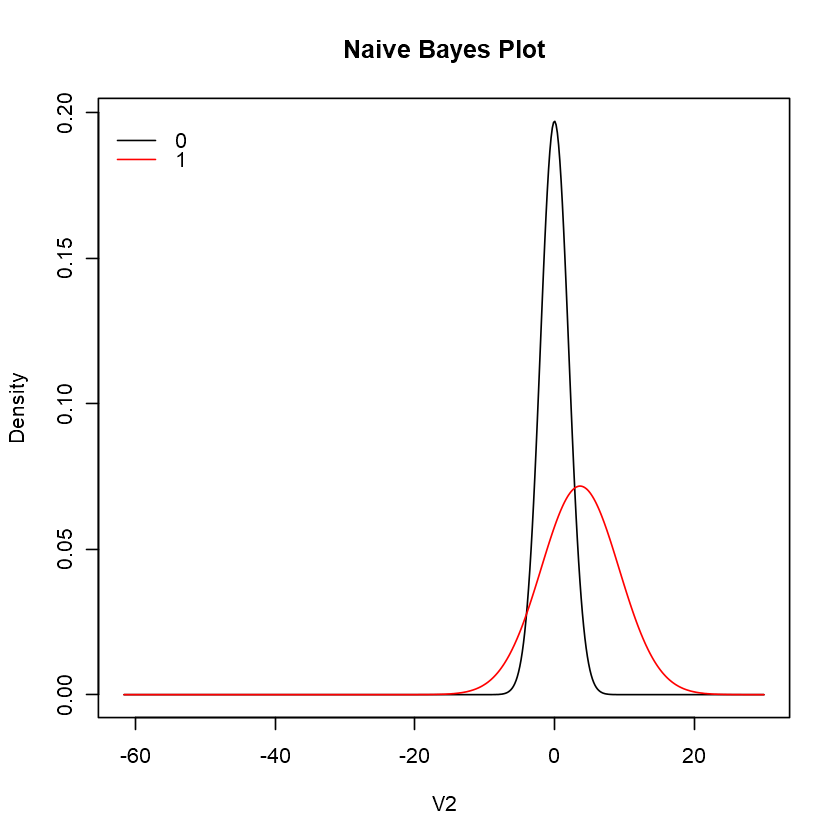

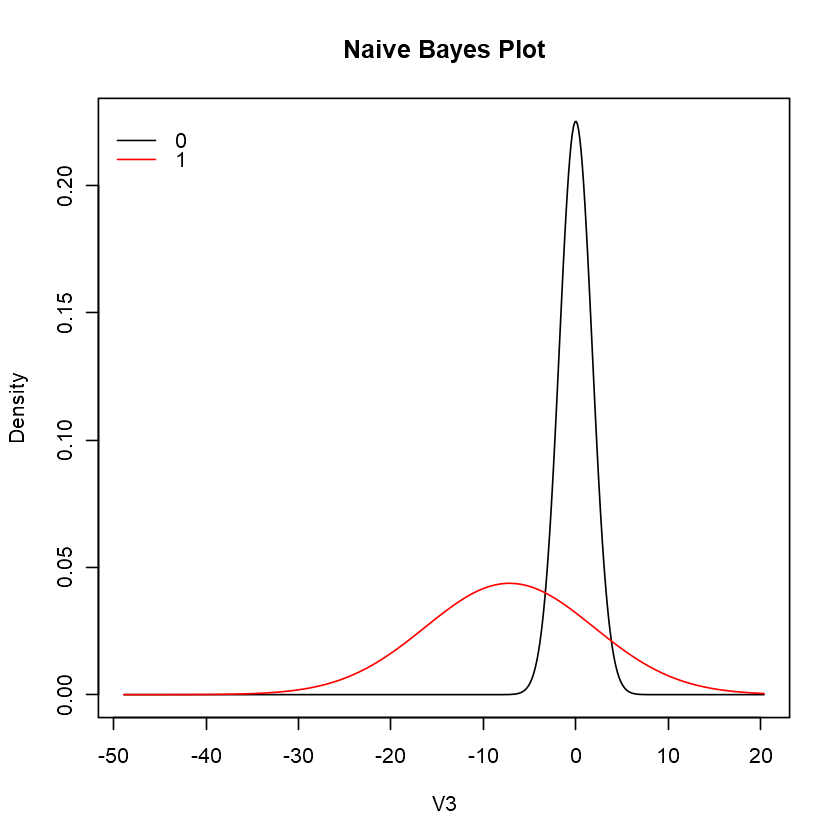

In [66]:
plot(bayes, which = c(1, 2,3,4), ask = TRUE,
     arg.num = list(col = 1:3, lty = 1, main = "Naive Bayes Plot"))

Area under the curve (AUC): 0.897

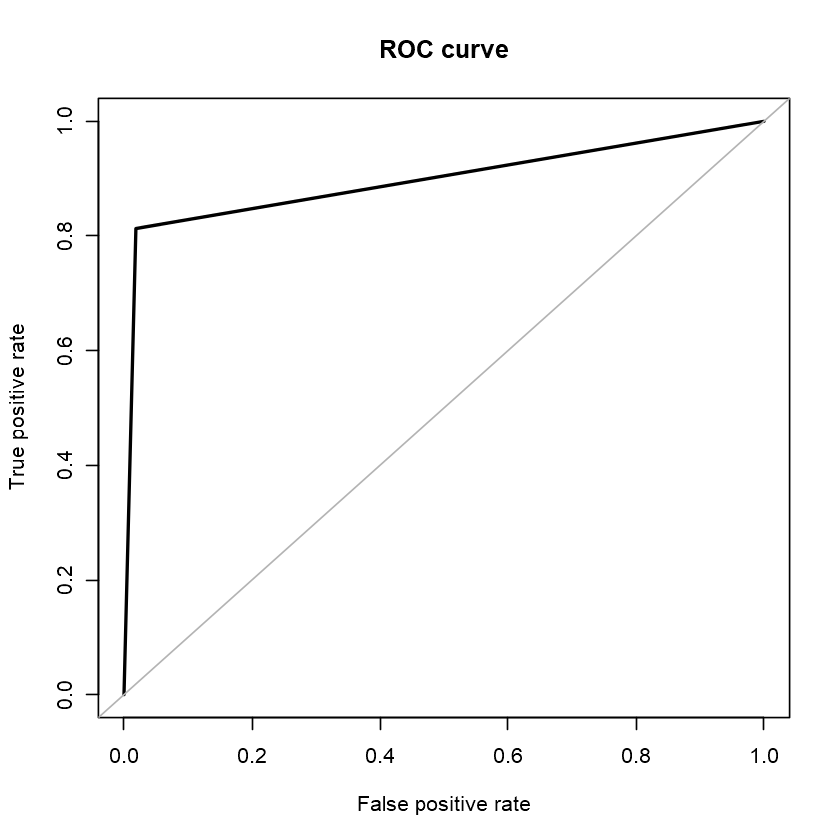

In [69]:
roc.curve(test$Class, pred, plotit = T)
